### Importing Libraries

In [3]:
import pandas as pd
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading Dataset

In [4]:
df = pd.read_csv("Q2_data.csv")
df

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,"985,239,504",PoS,Ethereum
1,UNI,9.918768e+07,3992451215,"1,000,000,000",PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,"163,106",PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,"431,804,080",PoS,Avalanche
4,DAI,2.177113e+08,5513660644,"5,347,888,596",stablecoin,Ethereum
5,SHIB,2.479944e+08,5606251419,"589,589,040,239,380",PoS,Ethereum
6,LTC,5.913019e+08,5729295460,"84,000,000",PoW,Litecoin
7,TRX,2.719028e+08,6018922345,"88,996,805,683",PoS,Tron
8,DOT,2.035592e+08,6659549868,"1,364,182,225",PoW,Polkadot
9,MATIC,4.232990e+08,8053184610,"10,000,000,000",PoS,Polygon


## Section 1:

### Hierarchical Clustering

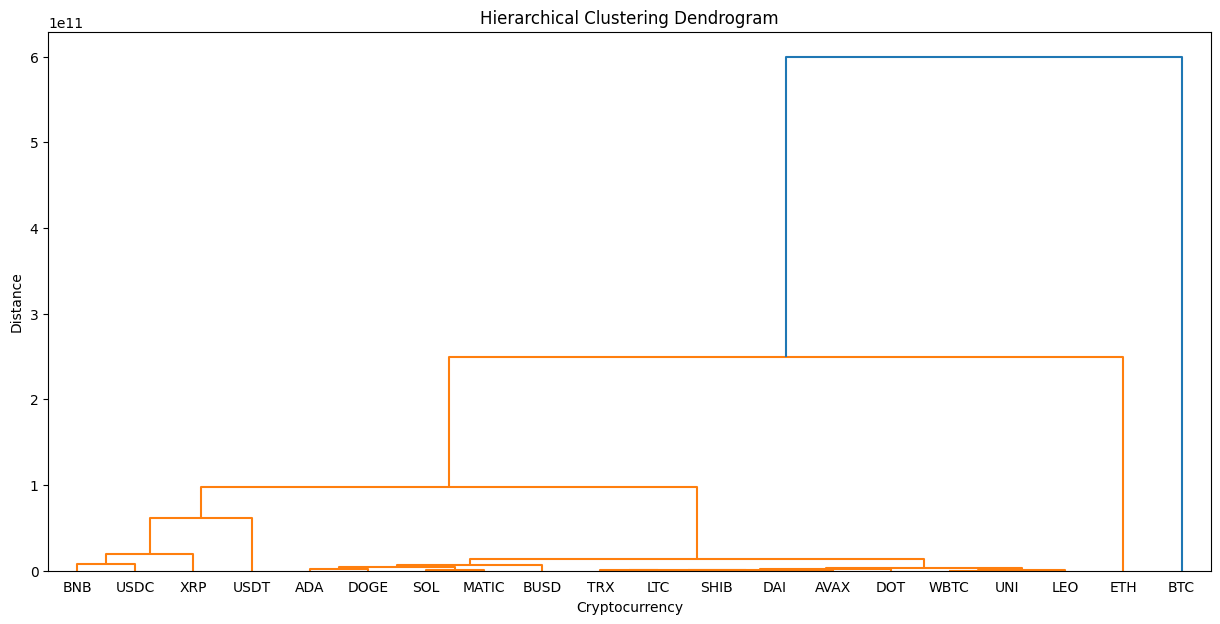

In [5]:
data = df[["MarketCap", "Volume"]]

# Perform hierarchical clustering
linkage_matrix = linkage(data, method="ward")

# Create a dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, orientation="top", labels=df["Symbol"].tolist(), distance_sort="descending", leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cryptocurrency")
plt.ylabel("Distance")
plt.show()

#### Using Plotly

In [6]:
labels = df["Symbol"].tolist()

# Perform hierarchical clustering
linkage_matrix = linkage(data, method="ward")

# Create the dendrogram using Plotly
fig = ff.create_dendrogram(data, labels=labels)
fig.update_layout(
    width=800,
    height=500,
    title="Hierarchical Clustering Dendrogram",
    xaxis_title="Cryptocurrency",
    yaxis_title="Distance"
)
fig.show()

'maxclust': This is the default criterion and allows you to specify the number of clusters (t) you want to create. The algorithm then forms t clusters by cutting the dendrogram at the t-1 largest height gaps. This criterion is helpful when you have a predefined number of clusters in mind.

In [7]:
# Perform hierarchical clustering
linkage_matrix = linkage(data, method="ward")

# Specify the number of clusters (in this case, 2)
num_clusters = 2

# Use the fcluster function to assign data points to clusters
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add the cluster information to the original DataFrame
df['Cluster'] = clusters

# Print the resulting clusters
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

print("Cluster 1:")
print(cluster_1)
print("\nCluster 2:")
print(cluster_2)

Cluster 1:
   Symbol        Volume     MarketCap          TotalSupply   ProofType  \
0     LEO  1.823284e+06    3586504072          985,239,504         PoS   
1     UNI  9.918768e+07    3992451215        1,000,000,000         PoS   
2    WBTC  1.415410e+08    4237575489              163,106         PoW   
3    AVAX  2.197065e+08    4901630273          431,804,080         PoS   
4     DAI  2.177113e+08    5513660644        5,347,888,596  stablecoin   
5    SHIB  2.479944e+08    5606251419  589,589,040,239,380         PoS   
6     LTC  5.913019e+08    5729295460           84,000,000         PoW   
7     TRX  2.719028e+08    6018922345       88,996,805,683         PoS   
8     DOT  2.035592e+08    6659549868        1,364,182,225         PoW   
9   MATIC  4.232990e+08    8053184610       10,000,000,000         PoS   
10    SOL  6.338963e+08    8349992848          559,509,636         PoH   
11   DOGE  6.311493e+08   10342393982      141,339,436,384         PoW   
12    ADA  3.647996e+08   1

## Section 2:

### Adding "ProofType"

Cluster 1:
   Symbol        Volume     MarketCap          TotalSupply   ProofType  \
0     LEO  1.823284e+06    3586504072          985,239,504         PoS   
1     UNI  9.918768e+07    3992451215        1,000,000,000         PoS   
2    WBTC  1.415410e+08    4237575489              163,106         PoW   
3    AVAX  2.197065e+08    4901630273          431,804,080         PoS   
4     DAI  2.177113e+08    5513660644        5,347,888,596  stablecoin   
5    SHIB  2.479944e+08    5606251419  589,589,040,239,380         PoS   
6     LTC  5.913019e+08    5729295460           84,000,000         PoW   
7     TRX  2.719028e+08    6018922345       88,996,805,683         PoS   
8     DOT  2.035592e+08    6659549868        1,364,182,225         PoW   
9   MATIC  4.232990e+08    8053184610       10,000,000,000         PoS   
10    SOL  6.338963e+08    8349992848          559,509,636         PoH   
11   DOGE  6.311493e+08   10342393982      141,339,436,384         PoW   
12    ADA  3.647996e+08   1

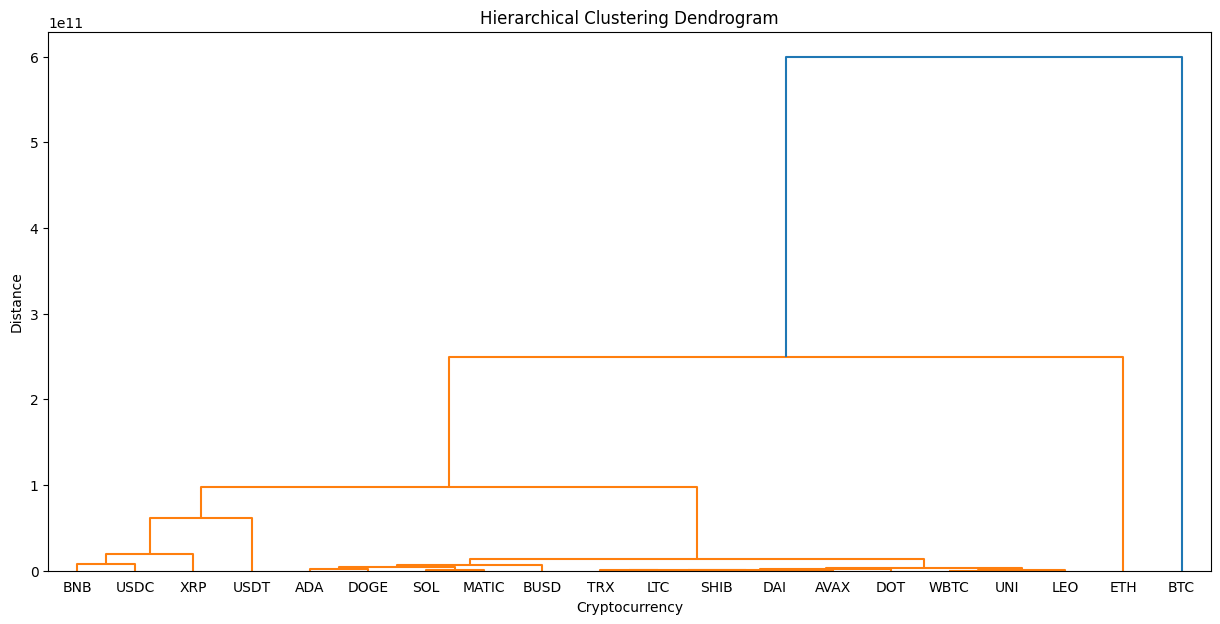

In [8]:
# Use Label Encoding to convert 'ProofType' to numerical values
label_encoder = LabelEncoder()
data["ProofType"] = label_encoder.fit_transform(df["ProofType"])

# Perform hierarchical clustering
linkage_matrix = linkage(data, method="ward")

# Specify the number of clusters
num_clusters = 2

# Use the fcluster function to assign data points to clusters
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add the cluster information to the original DataFrame
df['Cluster'] = clusters

# Print the resulting clusters
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

print("Cluster 1:")
print(cluster_1)
print("\nCluster 2:")
print(cluster_2)

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, orientation="top", labels=df["Symbol"].tolist(), distance_sort="descending", leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cryptocurrency")
plt.ylabel("Distance")
plt.show()

## Section 3:

### Adding "Network"

Cluster 1:
   Symbol        Volume     MarketCap          TotalSupply   ProofType  \
0     LEO  1.823284e+06    3586504072          985,239,504         PoS   
1     UNI  9.918768e+07    3992451215        1,000,000,000         PoS   
2    WBTC  1.415410e+08    4237575489              163,106         PoW   
3    AVAX  2.197065e+08    4901630273          431,804,080         PoS   
4     DAI  2.177113e+08    5513660644        5,347,888,596  stablecoin   
5    SHIB  2.479944e+08    5606251419  589,589,040,239,380         PoS   
6     LTC  5.913019e+08    5729295460           84,000,000         PoW   
7     TRX  2.719028e+08    6018922345       88,996,805,683         PoS   
8     DOT  2.035592e+08    6659549868        1,364,182,225         PoW   
9   MATIC  4.232990e+08    8053184610       10,000,000,000         PoS   
10    SOL  6.338963e+08    8349992848          559,509,636         PoH   
11   DOGE  6.311493e+08   10342393982      141,339,436,384         PoW   
12    ADA  3.647996e+08   1

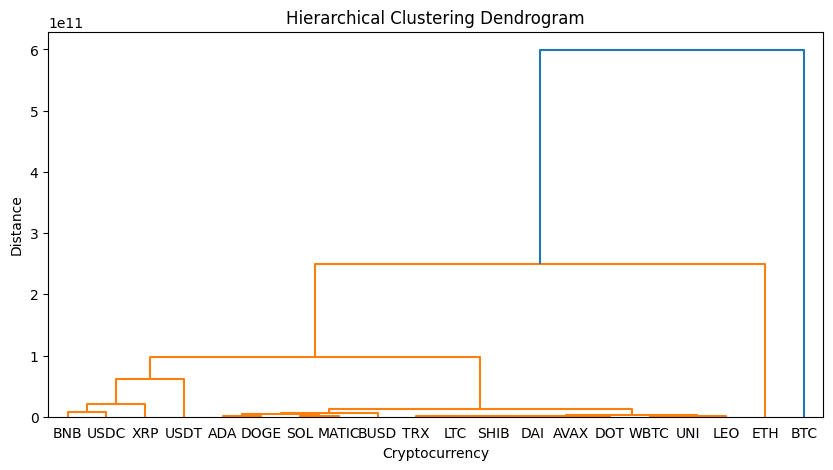

In [9]:
# Use Label Encoding to convert 'Network' to numerical values
label_encoder = LabelEncoder()
data["Network"] = label_encoder.fit_transform(df["Network"])

# Perform hierarchical clustering
linkage_matrix = linkage(data, method="ward")

# Specify the number of clusters
num_clusters = 2

# Use the fcluster function to assign data points to clusters
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add the cluster information to the original DataFrame
df['Cluster'] = clusters

# Print the resulting clusters
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

print("Cluster 1:")
print(cluster_1)
print("\nCluster 2:")
print(cluster_2)

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation="top", labels=df["Symbol"].tolist(), distance_sort="descending", leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cryptocurrency")
plt.ylabel("Distance")
plt.show()